In [6]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Discussion

0-20 mins

In [3]:
0.975 ** 100

0.07951728986183142

## More Confidence Intervals and Sample Size

In [25]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


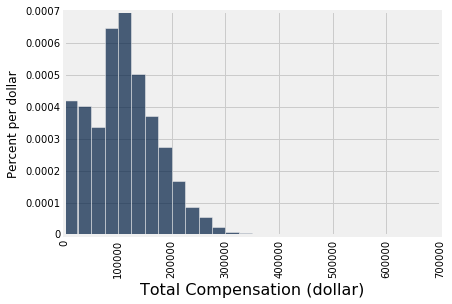

In [26]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

In [28]:
def bootstrap_mean(sample_from_population, label, repetitions):
    resampled_means = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        mean = np.mean(resample.column(label))
        resampled_means.append(mean)
    return resampled_means

def bootstrap_ci_mean(sample_from_population, label, repetitions):
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    interval_95 = make_array(
        percentile(2.5, resampled_means),
        percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plt.plot(interval_95, [0, 0], color='gold', lw=8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

In [31]:
sf_sample = sf.sample(200)
sf_sample.show(3)

Organization Group,Job,Total Compensation
General Administration & Finance,Planner 4-Environmental Review,"173,480"
Public Protection,Captain 3,"145,434"
"Public Works, Transportation & Commerce","Manager VIII, MTA","230,315"


In [49]:
np.std(sf.column(2))

63071.254794419299

In [50]:
np.std(sf_sample.column(2))

62350.527382697503

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 102296.164  119965.683]


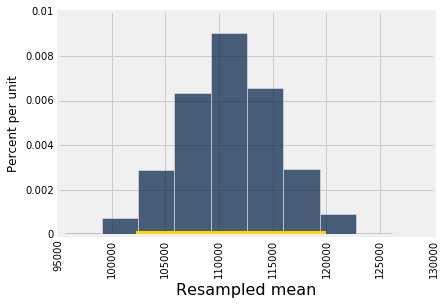

In [38]:
bootstrap_ci_mean(sf_sample, 'Total Compensation', 5000)

In [36]:
119780 - 102318

17462

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 106064.714  114513.767]


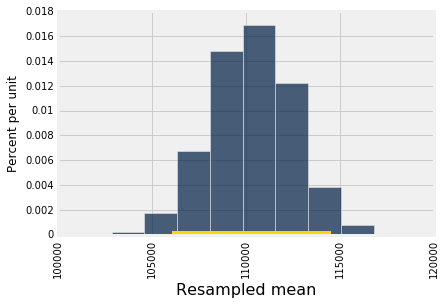

In [39]:
bootstrap_ci_mean(sf.sample(800), 'Total Compensation', 5000)

In [40]:
114326 - 106301

8025

## Experiment Design

In [16]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
np.std(votes)

0.29999999999999999

In [8]:
total_voters=10

def sd_voters(n_voters_for_a):
    votes = np.append(np.ones(n_voters_for_a), np.zeros(total_voters - n_voters_for_a))
    print(votes)
    return np.std(votes)

sd_voters(5)

[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]


0.5

In [51]:
_ = interact(sd_voters, n_voters_for_a=(0, 10))

In [16]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
np.std(votes)

0.29999999999999999

In [11]:
worst_sd_of_population = 0.5
width_in_sds = 4 # For 95% of a normal distribution, mean +/- 2 SDs
desired_width = 0.03 
sample_size = (worst_sd_of_population * width_in_sds / desired_width) ** 2
sample_size

4444.444444444445

In [12]:
n = 4445

### Conducting the experiment

In [13]:
# Hide before lecture
voters = Table().with_column(
    'Candidate', ['A', 'B'],
    'Chance',    [0.5, 0.5]) # Might be different in live lecture!

In [14]:
voters.labels

('Candidate', 'Chance')

In [15]:
voters.select(0)

Candidate
A
B


In [16]:
sum(voters.column(1))

1.0

In [20]:
observed_sample = voters.select(0).sample(n, weights=voters.column('Chance'))
observed_sample.show(3)

Candidate
B
A
A


In [18]:
means = []
for i in np.arange(1000):
    resample = observed_sample.sample()
    means.append(np.count_nonzero(resample.column(0) == 'A') / n)
print(percentile(2.5, means), percentile(97.5, means))

0.47829021372328456 0.5079865016872891


In [19]:
voters

Candidate,Chance
A,0.5
B,0.5
